# Notebook :interprétation des résultats (analyse_yolo)

In [ ]:
# --- 1 : Imports et config ---
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

sns.set(style="whitegrid") # Style seaborn pour les graphiques

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# --- Cellule 2 : Charger les résultats d’entraînement ---
# le chemin vers dossier
csv_files = glob.glob("./resultat/train*/results.csv")
print("Fichiers trouvés :", csv_files)

results = {}
for path in csv_files:
    model_name = os.path.basename(os.path.dirname(path))  # nom du dossier du modèle
    results[model_name] = pd.read_csv(path)

# Aperçu d'un DataFrame
results[list(results.keys())[0]].head()

Fichiers trouvés : ['./resultat/train_y-8n_nvp/results.csv', './resultat/train_y_8n/results.csv', './resultat/train_y_9s/results.csv', './resultat/train_y_8n_da/results.csv', './resultat/train_y_8s/results.csv']


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,11.9747,2.12093,3.53352,1.97959,0.00962,0.69231,0.11326,0.06451,1.88484,3.33120,1.86822,0.000367,0.000367,0.000367
1,2,20.0067,1.87750,2.93490,1.81976,0.57493,0.04945,0.13795,0.06525,1.96610,3.09829,1.79524,0.000743,0.000743,0.000743
2,3,27.4375,1.89733,2.81487,1.82859,0.34001,0.18681,0.16999,0.08238,1.91167,2.73130,1.95508,0.001111,0.001111,0.001111
3,4,35.8743,1.92662,2.72690,1.85414,0.15133,0.13736,0.07171,0.02562,2.59089,5.75914,2.58960,0.001472,0.001472,0.001472
4,5,44.0148,1.91318,2.58888,1.77177,0.18753,0.18132,0.09338,0.04302,2.25199,3.73712,2.19572,0.001601,0.001601,0.001601


 
 **train_y_8n:** c'est le modele yolov8n

 **train_y-8n_nvp:** c'est le modele yolov8n avec changement des paramétres

 **train_y_8n_da:** yolov8n apres le data augementation

 **train_y_9s:** YOLOv9 avec le data augementation
 
 **train_y_8s:** c'est le modele yolo8s sans data augementation

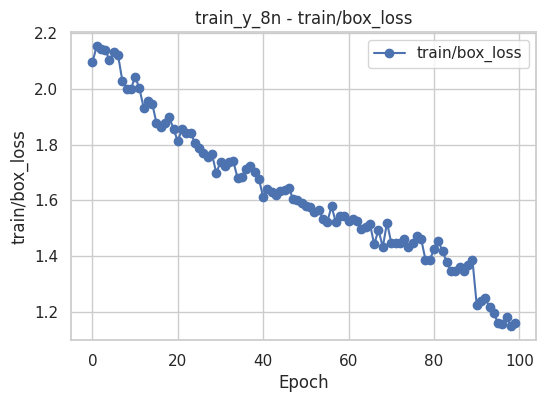

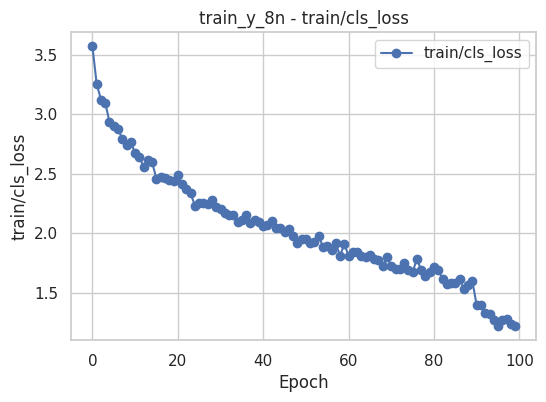

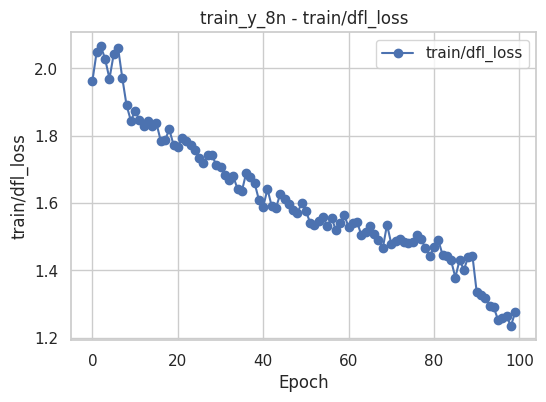

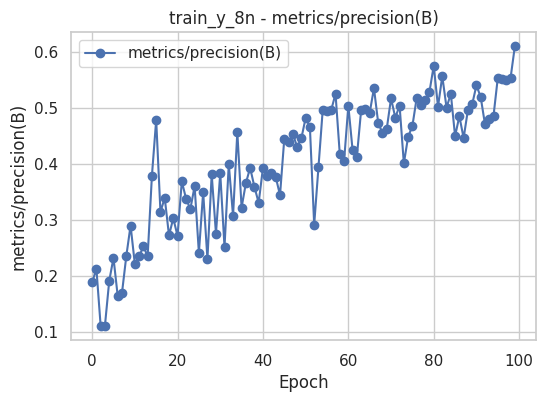

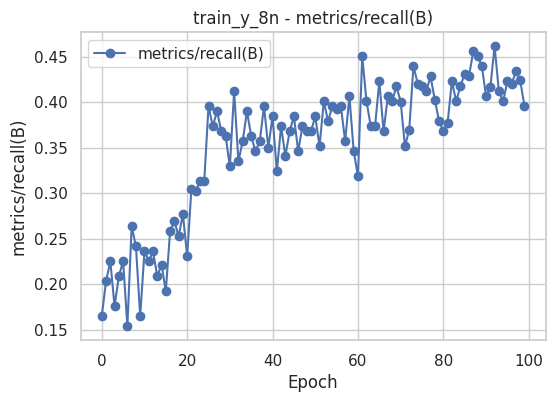

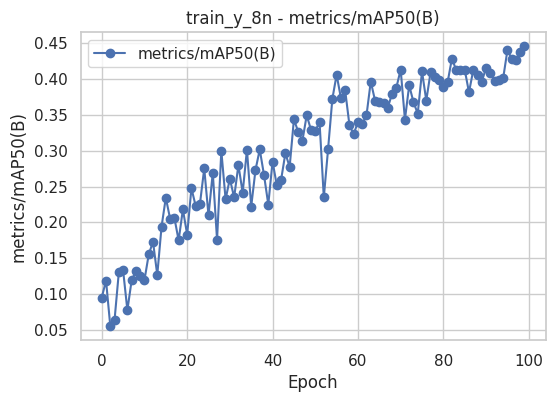

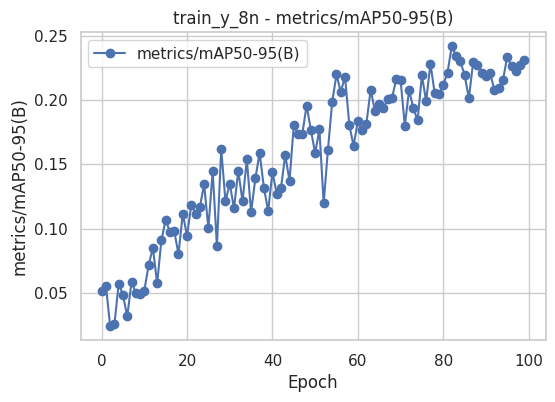

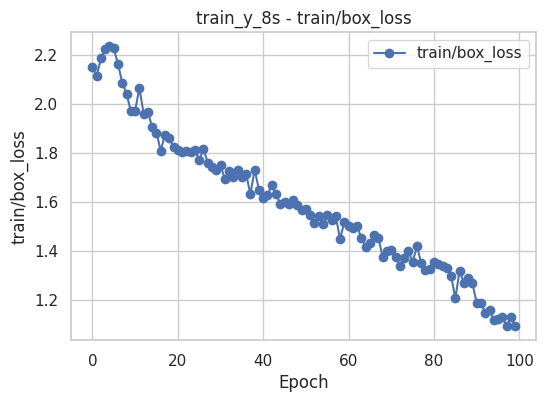

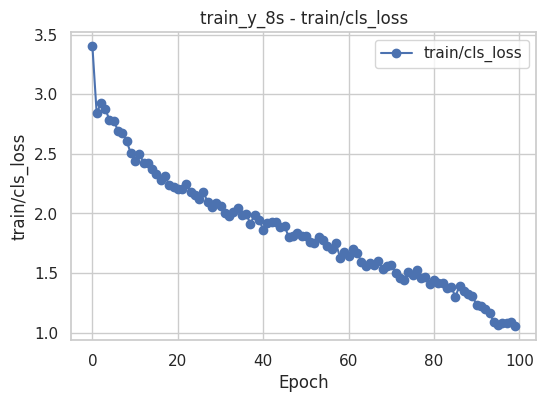

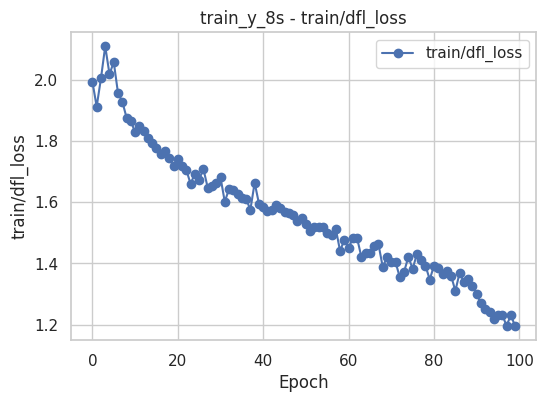

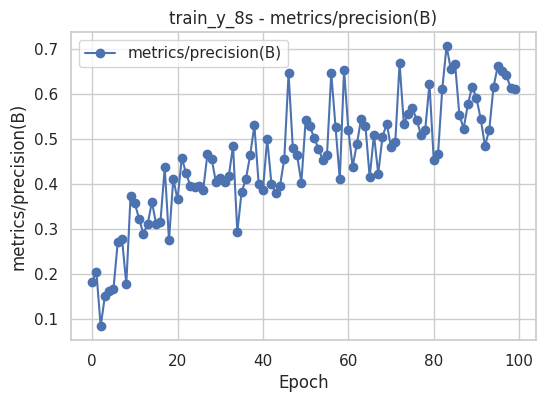

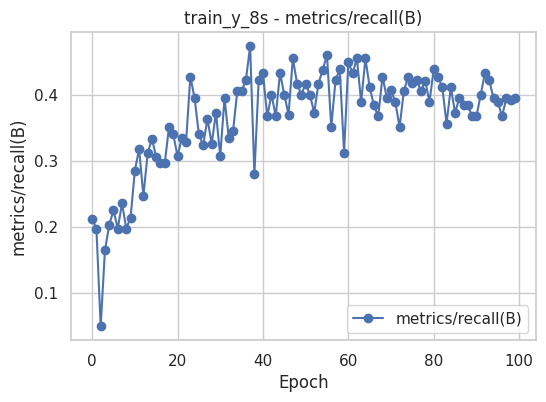

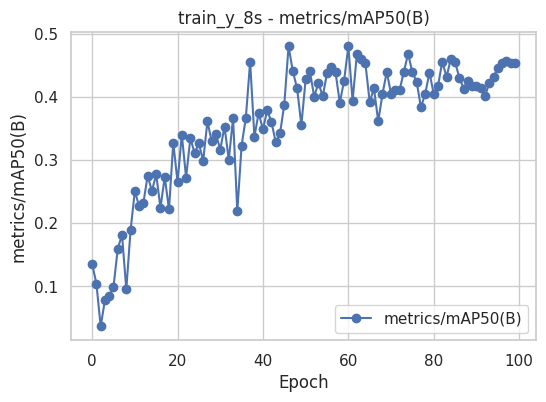

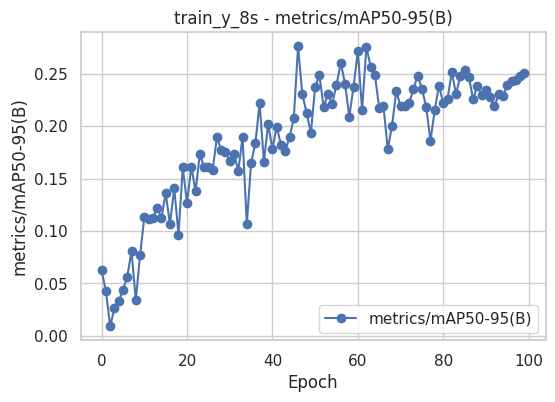

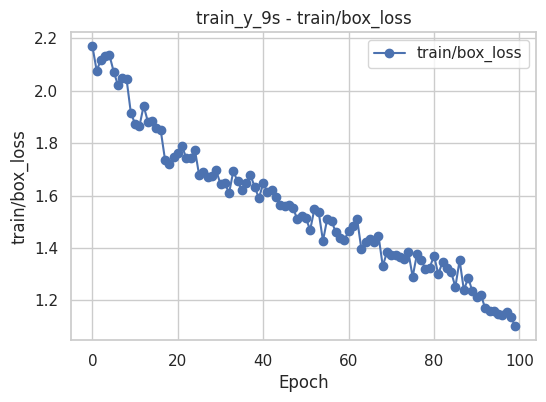

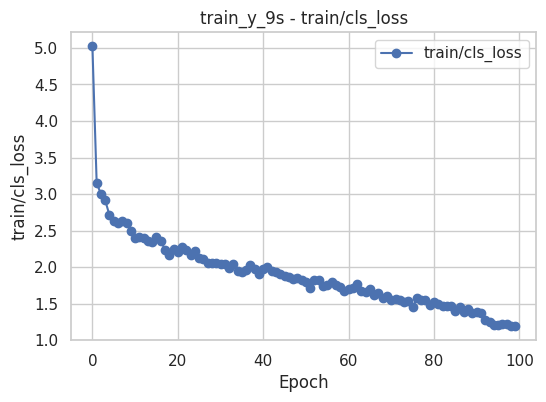

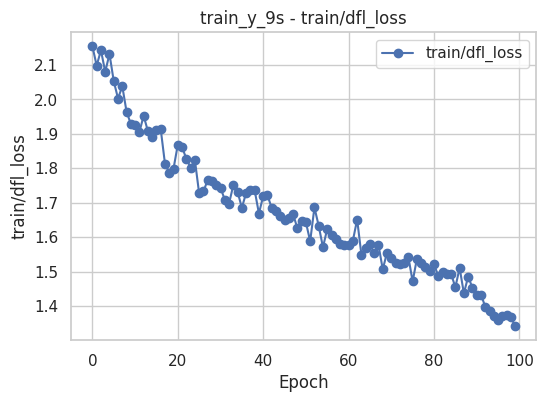

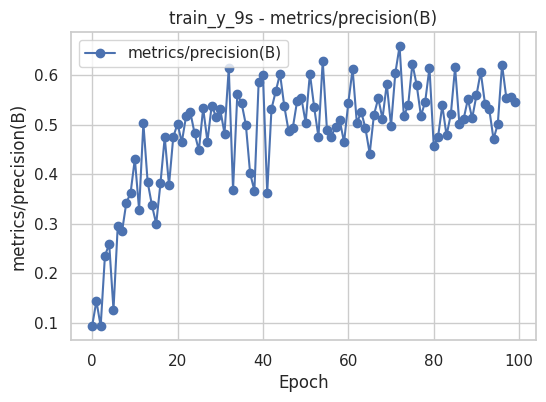

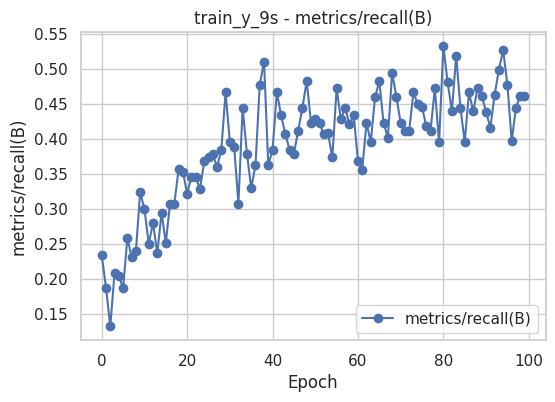

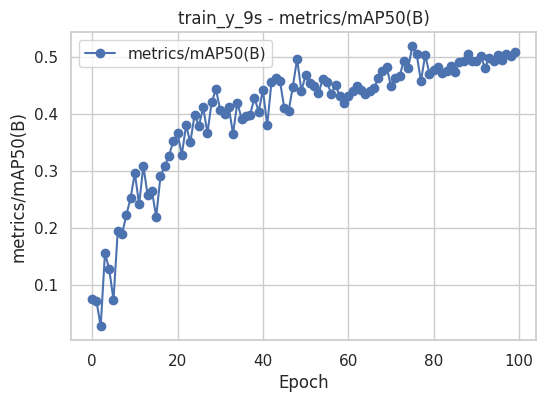

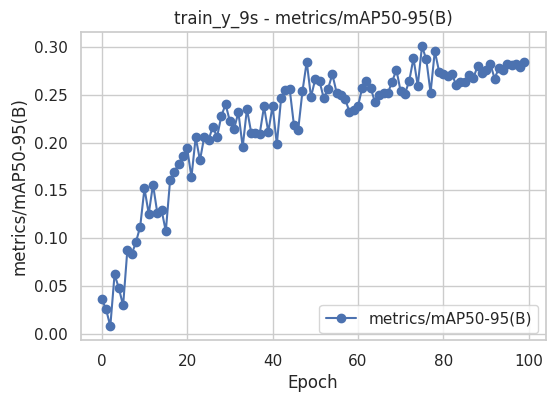

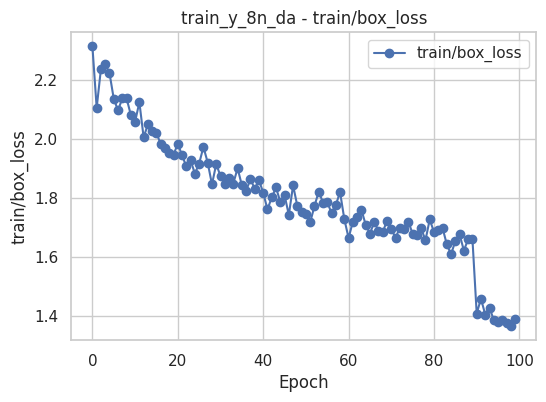

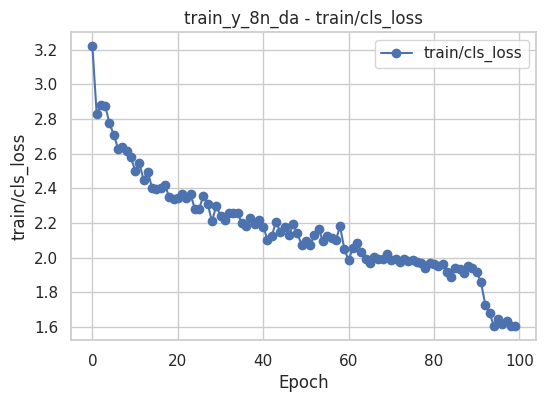

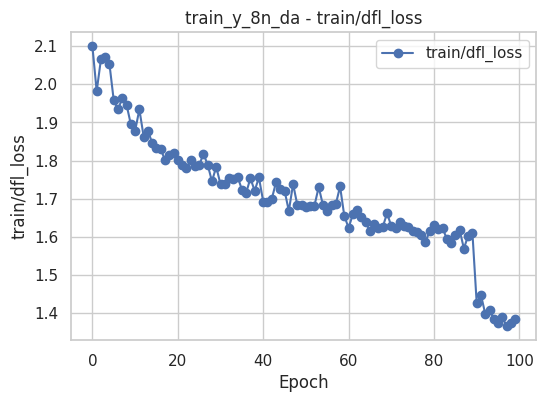

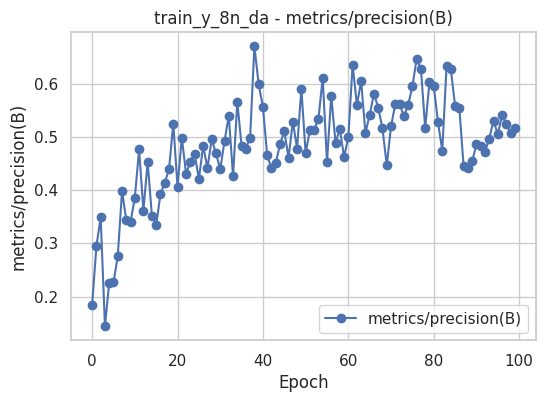

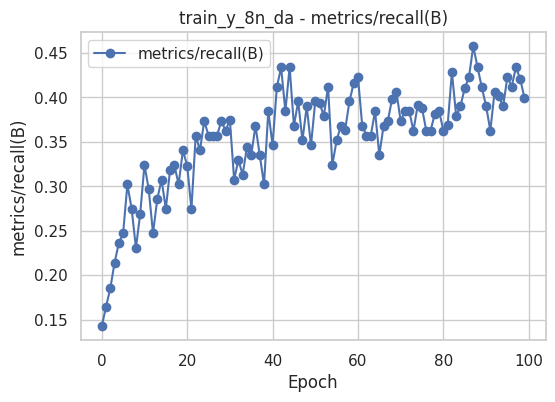

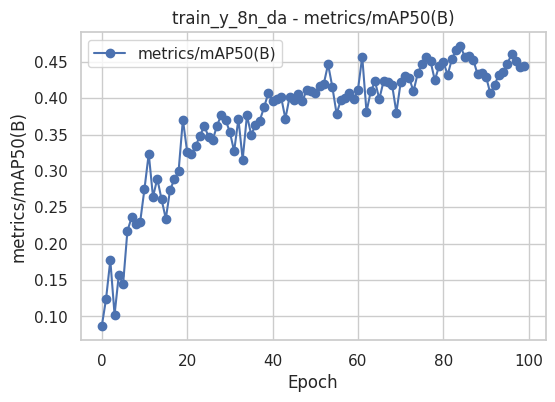

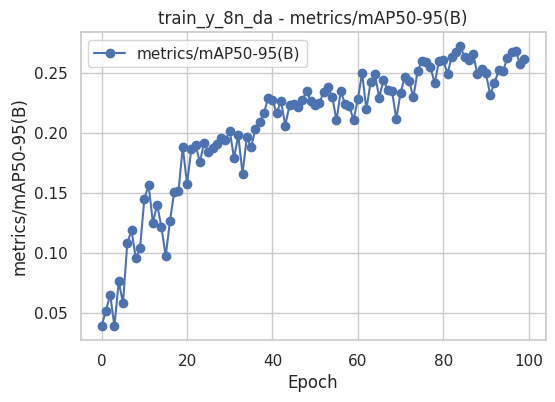

In [39]:
# --- Cellule 3 : Visualiser les métriques au cours de l’entraînement ---
def plot_metrics(df, model_name):
    metrics = ["train/box_loss", "train/cls_loss", "train/dfl_loss", 
            "metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]
    
    for col in metrics:
        if col in df.columns:
            plt.figure(figsize=(6,4))
            plt.plot(df.index, df[col], marker="o", label=col)
            plt.title(f"{model_name} - {col}")
            plt.xlabel("Epoch")
            plt.ylabel(col)
            plt.legend()
            plt.show()

# Exp modèle
plot_metrics(results["train_y_8n"], "train_y_8n")
plot_metrics(results["train_y_8s"], "train_y_8s")
plot_metrics(results["train_y_9s"], "train_y_9s")
plot_metrics(results["train_y_8n_da"], "train_y_8n_da")

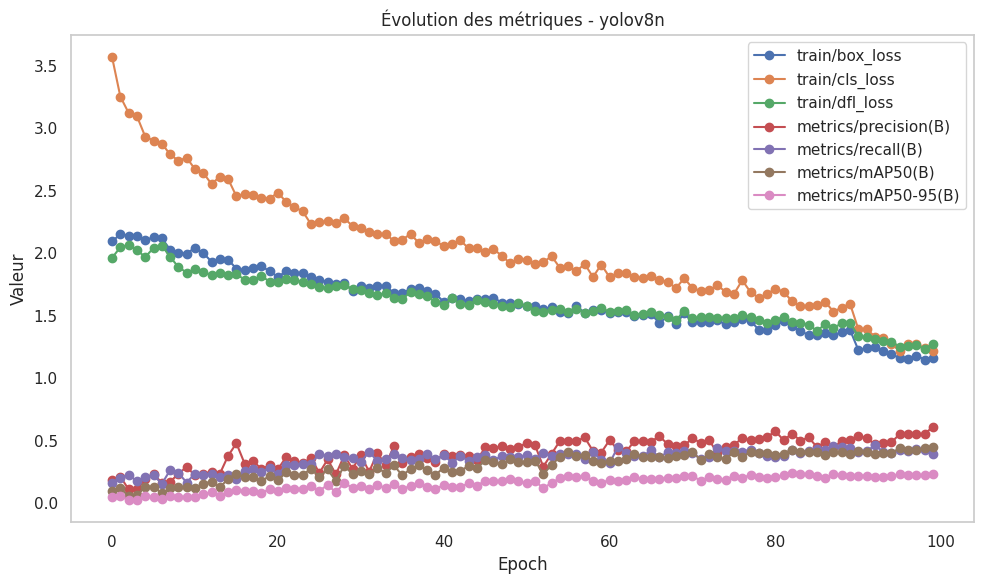

✅ Graphique sauvegardé : result_8n.png


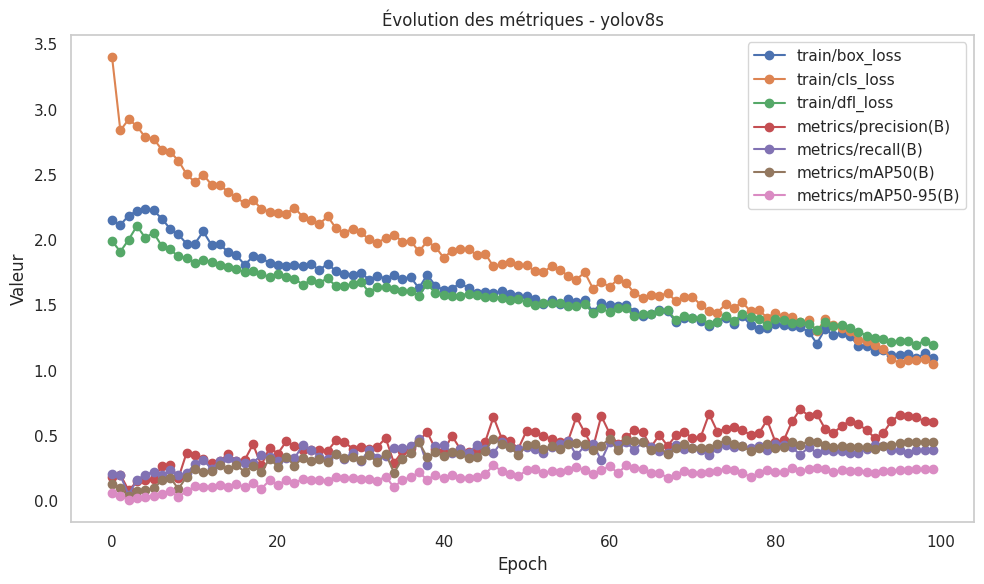

✅ Graphique sauvegardé : result_8s.png


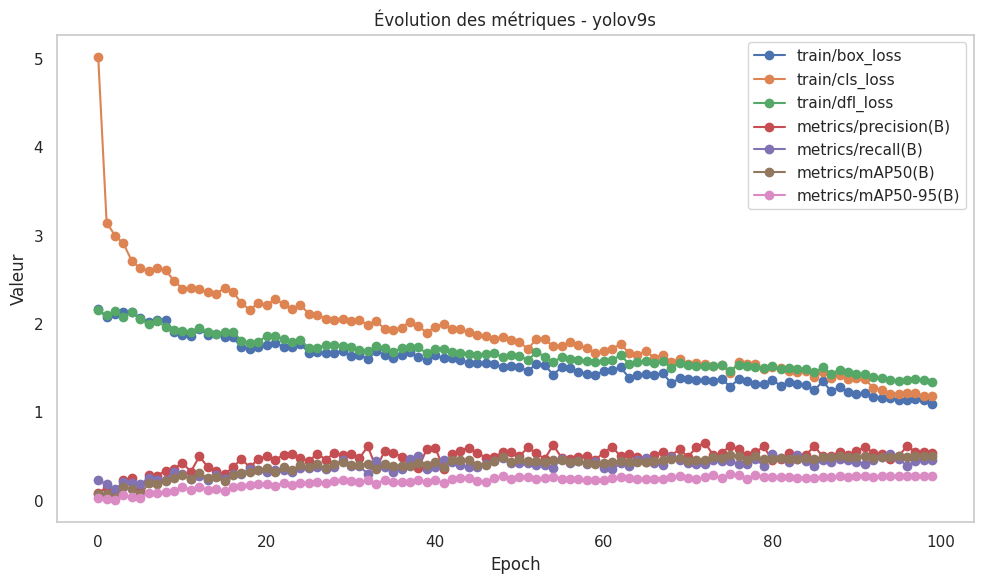

✅ Graphique sauvegardé : result_9s.png


In [ ]:
# --- Visualiser toutes les métriques dans un seul graphique ---
import matplotlib.pyplot as plt

def plot_all_metrics(df, model_name, save_path="result.png"):
    metrics = [
        "train/box_loss", 
        "train/cls_loss", 
        "train/dfl_loss", 
        "metrics/precision(B)", 
        "metrics/recall(B)", 
        "metrics/mAP50(B)", 
        "metrics/mAP50-95(B)"
    ]
    
    plt.figure(figsize=(10,6))
    
    for col in metrics:
        if col in df.columns:
            plt.plot(df.index, df[col], marker="o", label=col)
    
    plt.title(f"Évolution des métriques - {model_name}")
    plt.xlabel("Epoch")
    plt.ylabel("Valeur")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()
    print(f" Graphique sauvegardé : {save_path}")


results_8n = pd.read_csv("./resultat/train_y_8n/results.csv")
results_8s = pd.read_csv("./resultat/train_y_8s/results.csv")
results_9s = pd.read_csv("./resultat/train_y_9s/results.csv")

plot_all_metrics(results_8n, "yolov8n", "result_8n.png")
plot_all_metrics(results_8s, "yolov8s", "result_8s.png")
plot_all_metrics(results_9s, "yolov9s", "result_9s.png")



In [ ]:
# --- Cellule 4 : 1 Comparer les modèles sur les dernières métriques(last epoch) ---
summaries = []
for model_name, df in results.items():
    last = df.iloc[-1]  
    summaries.append({
        "model": model_name,
        "epochs": len(df),
        "precision": last.get("metrics/precision(B)", None),
        "recall": last.get("metrics/recall(B)", None),
        "mAP50": last.get("metrics/mAP50(B)", None),
        "mAP50-95": last.get("metrics/mAP50-95(B)", None)
    })

df_summary = pd.DataFrame(summaries)
df_summary


,model,epochs,precision,recall,mAP50,mAP50-95
0,train_y-8n_nvp,100,0.50885,0.46703,0.44601,0.24333
1,train_y_8n,100,0.61089,0.39560,0.44557,0.23108
2,train_y_9s,100,0.54537,0.46154,0.50996,0.28385
3,train_y_8n_da,100,0.51672,0.39948,0.44494,0.26130
4,train_y_8s,100,0.61076,0.39560,0.45417,0.25079


In [ ]:
# --- Cellule 4 : 2 Comparer les modèles sur les métriques ---

#
best_summaries = []
mean_summaries = []

for model_name, df in results.items():
    
    # --- Meilleur epoch (par mAP50) ---
    if "metrics/mAP50(B)" in df.columns:
        best_idx = df["metrics/mAP50(B)"].idxmax()
        best = df.iloc[best_idx]
        best_summaries.append({
            "model": model_name,
            "epochs": len(df),
            "precision": best.get("metrics/precision(B)", None),
            "recall": best.get("metrics/recall(B)", None),
            "mAP50": best.get("metrics/mAP50(B)", None),
            "mAP50-95": best.get("metrics/mAP50-95(B)", None)
        })
    
    # --- Moyenne sur toutes les epochs ---
    
    mean_summaries.append({
        "model": model_name,
        "epochs": len(df),
        "precision": df["metrics/precision(B)"].mean() if "metrics/precision(B)" in df.columns else None,
        "recall": df["metrics/recall(B)"].mean() if "metrics/recall(B)" in df.columns else None,
        "mAP50": df["metrics/mAP50(B)"].mean() if "metrics/mAP50(B)" in df.columns else None,
        "mAP50-95": df["metrics/mAP50-95(B)"].mean() if "metrics/mAP50-95(B)" in df.columns else None
    })

df_best = pd.DataFrame(best_summaries)
df_mean = pd.DataFrame(mean_summaries)

print("=== Meilleur Epoch ===")
display(df_best)

print("=== Moyenne Epochs ===")
display(df_mean)



=== Meilleur Epoch ===


,model,epochs,precision,recall,mAP50,mAP50-95
0,train_y-8n_nvp,100,0.59958,0.45604,0.48003,0.25917
1,train_y_8n,100,0.61089,0.39560,0.44557,0.23108
2,train_y_9s,100,0.62344,0.44575,0.51929,0.30074
3,train_y_8n_da,100,0.62777,0.39011,0.47145,0.27213
4,train_y_8s,100,0.52105,0.45055,0.47990,0.27153


=== Moyenne Epochs ===


,model,epochs,precision,recall,mAP50,mAP50-95
0,train_y-8n_nvp,100,0.481323,0.388351,0.371917,0.199537
1,train_y_8n,100,0.402252,0.351817,0.299935,0.156577
2,train_y_9s,100,0.483091,0.390575,0.401727,0.219868
3,train_y_8n_da,100,0.483515,0.354784,0.371320,0.204477
4,train_y_8s,100,0.456760,0.365465,0.355222,0.187120


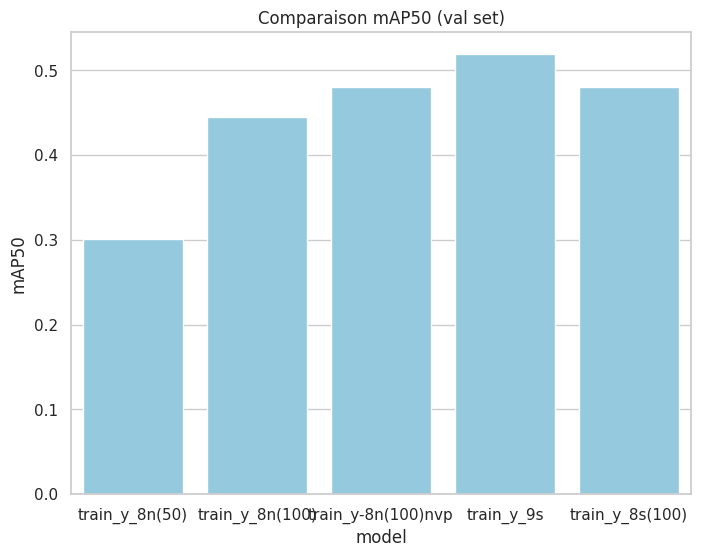

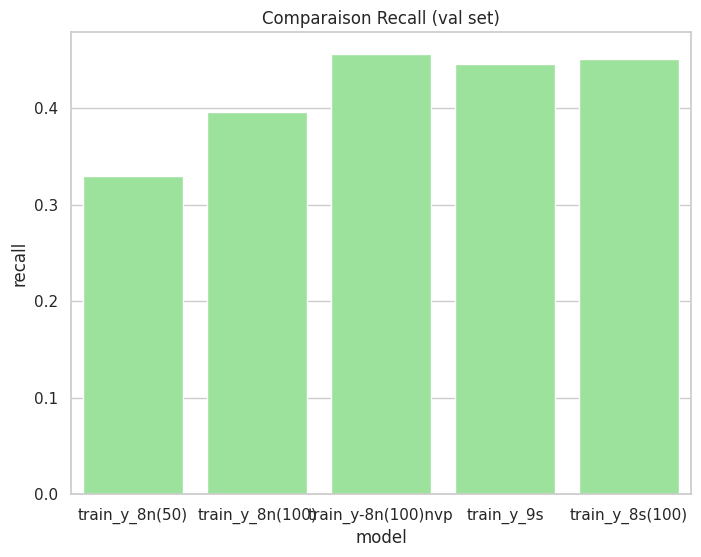

In [34]:
# --- Cellule 5 : Visualisation comparative ---
plt.figure(figsize=(8,6))
sns.barplot(data=df_best, x="model", y="mAP50", color="skyblue")
plt.title("Comparaison mAP50 (val set)")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(data=df_best, x="model", y="recall", color="lightgreen")
plt.title("Comparaison Recall (val set)")
plt.show()

In [ ]:
# --- Cellule 7 : Interprétation et ---
print("""
🔎 Interprétation (à compléter) :
- Si recall est bas → modèle rate des zones brûlées → augmenter epochs, augmenter imgsz
- Si precision est basse → trop de fausses alertes → vérifier annotations, augmenter batch
- Si mAP50 est élevé mais mAP50-95 faible → boîtes imprécises → augmenter imgsz
- Vérifier si le modèle overfit (gap train/val) → appliquer data augmentation, réduire learning rate
""")

# Interprétation des résultats

## 1. Comparaison globale entre modèles

- **YOLOv9s (train_y_9s)** obtient les **meilleures performances globales** :  
  - Précision ≈ **0.62**  
  - Rappel ≈ **0.44**  
  - mAP50 ≈ **0.52**  
  - mAP50-95 ≈ **0.30**  
  =>Cela montre que l’architecture **v9** est plus adaptée que **v8** sur ton dataset.

- **YOLOv8n avec data augmentation (train_y_8n_da)**  
  =>Améliore légèrement le **mAP50** et **mAP50-95** par rapport à YOLOv8n pur,  
  mais le **rappel reste bas (~0.39)**.  
  =>L’augmentation aide à mieux généraliser, mais ne corrige pas totalement le problème de détection des zones ratées.

- **YOLOv8s (train_y_8s)**  
  =>Rappel meilleur que YOLOv8n,  
  mais précision plus faible → **plus de fausses détections**.

---

## 2. Analyse par métriques

- **Recall assez bas (<0.46 pour tous les modèles)**  
  =>Le modèle rate beaucoup de zones brûlées.  
    Solutions possibles :  
  - Augmenter le nombre d’**epochs** (100 peut être trop peu si dataset complexe).  
  - Augmenter **imgsz** (ex. 640 ou 768 au lieu de 512).  
  - on doit Vérifier si certaines **annotations sont manquantes ou incohérentes**.  

- **Precision correcte (~0.60 pour YOLOv8/9n, mais baisse sur YOLOv8s)**  
  =>YOLOv8n/9s limitent les fausses alertes, YOLOv8s est moins stable.  
  =>Vérifier si certaines classes sont **surreprésentées** dans les données.  

- **mAP50 correct (>0.47 pour les meilleurs modèles), mais mAP50-95 bas (~0.25–0.30)**  
  =>Le modèle trouve les zones, mais les boîtes englobantes manquent de précision.  
  

- **Overfitting ?**  
  → À vérifier en comparant **train vs val**.  
  → D’après les résultats, pas de surapprentissage clair → plutôt **manque de puissance du modèle / dataset limité**.  

---

## 3. Impact de la data augmentation

- Sur **YOLOv8n**, la data augmentation augmente légèrement le **mAP50-95 (0.23 → 0.27)**.  
- Le **recall reste faible**, mais ça aide à réduire un peu le surapprentissage.  

 Conclusion : la **data augmentation aide, mais n’est pas suffisante seule**.

---

## 4. pistes 

 Augmenter la taille des images (**imgsz=640 ou 768**)  
Augmenter le nombre d’**epochs** (200 ou plus)  
Tester des modèles plus puissants (**YOLOv9m, YOLOv8m**)  
 Vérifier la **qualité/équilibre du dataset** (zones bien annotées, pas de bruit)  
Ajouter de la **data augmentation spécifique aux images satellites**  
